<a href="https://colab.research.google.com/github/c-daly/Notebooks/blob/main/CDaly_CS6120_NLP_Assignment_2_F22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CS 6120: Natural Language Processing - Prof. Ahmad Uzair

### Assignment 2: Text Classification and Neural Network
### Total Points: 100 points

In Assignment 2, you will be dealing with text classification using Multinomial Naive Bayes and Neural Networks. You will also be dealing with vector visualization. In the previous assingment you implemented Bag of Words as the feature selection method. However, in this assignment you will be using TF-IDF Vectorization instead of Bag of Words. We recommend starting with this assignment a little early as the datasets are quite large and several parts of the assignment might take long duration to execute. 

## Question 1 Text Classification

In the first question you will be dealing with Consumer Complaint Dataset. You are required to implement TF-IDF vectorization from scratch and perform Multinomial Naive Bayes Classification on dataset.
You may use appropriate packages or modules for fitting the Multinomial Naive Bayes Model, however, the implementation of the TF-IDF Vectorization should be from the scratch.

In [2]:
#importing the libraries

import numpy as np
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import fetch_20newsgroups
from pprint import pprint
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing
import pandas as pd
import re
import numpy as np
from nltk.tokenize import  word_tokenize 
import nltk
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics


The consumer complaint dataset comprises around 5000 complaints on six products.

In [3]:
# Read the csv file consumer_complaints.csv
mydata_train = pd.read_csv('consumer_complaints.csv')

In [4]:
# Print the product groups in the dataset
print(set(mydata_train.Product))

{'Credit card or prepaid card', 'Checking or savings account', 'Debt collection', 'Mortgage', 'Vehicle loan or lease', 'Student loan'}


In [5]:
# What is the type of 'mydata_train'
print(type(mydata_train))

<class 'pandas.core.frame.DataFrame'>


In [6]:
# Check the length of the data
print(len(mydata_train.Product))
print(len(mydata_train.Consumer_complaint_narrative))


5000
5000


### Expected Output: 
5000

5000


## Extracting Features from the Dataset                        (20 Points)

In order to perform machine learning on text documents, we first need to turn the text content into numerical feature vectors.

### TF-IDF Vectorization

Our model cannot simply read the text data so we convert it into numerical format. In order to convert the data into numerical format we create vectors from text.

For this particular purpose we could either employ Bag of Words or TF-IDF Vectorization

Bag of Words just creates a set of vectors containing the count of word occurrences in the document (reviews), while the TF-IDF model contains information on the more important words and the less important ones as well.

TF-IDF stands for Term Frequency-Inverse Document Frequency, which instead of giving more weight to words that occur more frequently, it gives a higher weight to words that occur less frequently.

Ref: 6.5 TF-IDF: Weighing terms in the vector section of Dan Jurafsky book
https://web.stanford.edu/~jurafsky/slp3/6.pdf

TF-IDF = Term Frequency (TF) * Inverse Document Frequency (IDF)

Term Frequency is the measure of the frequency of words in a document. It is the ratio of the number of times the word appears in a document compared to the total number of words in that document.

The words that occur rarely in the corpus have a high IDF score. It is the log of the ratio of the number of documents to the number of documents containing the word.

idf(t) = log(N/(df + 1))

In [7]:
text = mydata_train.Consumer_complaint_narrative


## Preprocessing the Corpus

In [8]:
from nltk import word_tokenize
nltk.download('punkt')
import string
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
# Preprocessing the data
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

stopword = nltk.corpus.stopwords.words('english')
def remove_URLs(text):
    text = re.sub(r"http\S+", "", text) # replaces URLs starting with http 
    text = re.sub(r"www.\S+", "", text) # replaces URLs starting with www
    return text
  
def remove_punctuation(text):
    return "".join([char for char in text if char not in string.punctuation]) 

def remove_digits(text):
    return "".join([char for char in text if char not in string.digits]) 

def remove_stopwords(text):
    return " ".join([word for word in re.split('\W+', text) if word not in stopword])

def performStemming(text, ps):
    return " ".join([ps.stem(word) for word in re.split('\W+', text)])

def performLemmatization(text, lem):
    return " ".join([lem.lemmatize(word) for word in re.split('\W+', text)])

def clean_line(line):
    line_cleaned = line.lower()
    line_cleaned = remove_URLs(line_cleaned)
    line_cleaned = remove_punctuation(line_cleaned)
    line_cleaned = remove_digits(line_cleaned)
    line_cleaned = remove_stopwords(line_cleaned)
    return word_tokenize(line_cleaned)
    
lines = [] 
word_list = [] 
 
for line in text:
    words = clean_line(line)
    lines.append(words)
    word_list = word_list + words
 

# Make sure the word_list contains unique tokens
word_list = set(word_list)

# Calculate the total documents present in the corpus
total_docs = len(lines) 
 
#Create a dictionary to keep track of index of each word
dict_idx = {} 
for i, word in enumerate(word_list):
  dict_idx[word] = i

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [9]:
def frequency_dict(lines):
    '''
    lines: list containing all the tokens
    ---
    freq_word: returns a dictionary which keeps the count of the number of documents containing the given word
    '''
    freq_word = {}
    for line in lines:
      for word in line:
        freq_word[word] = freq_word.get(word, 0) + 1

    return freq_word

In [10]:
# Create a dictionary containing the frequency of words utilizing the 'frequency_dict' function

# Expect this chunk to take a comparatively longer time to execute since our dataset is large

freq_word = frequency_dict(lines)

freq_word

{'lost': 238,
 'credit': 6613,
 'card': 3422,
 'chase': 891,
 'sapphire': 9,
 'reserve': 44,
 'late': 1241,
 'night': 81,
 'xxxx': 40554,
 'early': 162,
 'morning': 142,
 'made': 1806,
 'one': 2240,
 'purchase': 490,
 'time': 2569,
 'amount': 1998,
 'called': 2857,
 'soon': 201,
 'found': 532,
 'also': 1960,
 'realized': 101,
 'fraud': 1069,
 'charge': 941,
 'posted': 191,
 'account': 7750,
 'informed': 686,
 'unauthorized': 163,
 'helped': 34,
 'take': 806,
 'statement': 923,
 'however': 765,
 'received': 3109,
 'letter': 2036,
 'responsible': 225,
 'transaction': 570,
 'according': 235,
 'single': 121,
 'sheet': 18,
 'sent': 2084,
 'benefit': 53,
 'proofs': 7,
 'using': 358,
 'even': 1316,
 'bother': 16,
 'ask': 406,
 'store': 222,
 'signed': 452,
 'copy': 532,
 'receipt': 282,
 'things': 151,
 'like': 839,
 'security': 371,
 'surveillance': 7,
 'prove': 189,
 'disputed': 416,
 'transactions': 344,
 'agents': 81,
 'took': 543,
 'seriously': 70,
 'stuffs': 3,
 'receipts': 49,
 'back':

In [11]:
# Create a function to calculate the Term Frequency

def term_frequency(document, word):
    '''
    document: list containing the entire corpus
    word: word whose term frequency is to be calculated
    ---
    tf: returns term frequency value
    '''
    return sum([1 for token in document if token == word])/len(word)

In [12]:
# Create a function to calculate the Inverse Document Frequency
 
def inverse_df(word):
    '''
    word: word whose inverse document frequency is to be calculated
    ---
    idf: return inverse document frequency value
    '''
    return np.log10(total_docs/(freq_word.get(word, 0) + 1)) 

In [13]:
#Create a function to combine the term frequencies (TF) and inverse document (IDF) frequencies calculated above to get TF-IDF

def tfidf(sentence,dict_idx):
    '''
    sentence: list containing the entire corpus
    dict: dictionary keeping track of index of each word
    ---
    tf_idf_vec: returns computed tf-idf
    '''
    tf_idf_vec = [0] * len(freq_word)
    for word in sentence:
      tf = term_frequency(sentence, word)
      idf = inverse_df(word)
      tf_idf_vec[dict_idx[word]] = tf * idf

    return tf_idf_vec

In [14]:
#Compute the vectors utilizing the 'tfidf' function created above to obtain a TF-IDF Encoded text corpus
tf_idf_vecs = []
for sentence in lines:
  tf_idf_vecs.append(tfidf(sentence, dict_idx))

## Multinomial Naive Bayes (10 Points)

In [15]:
from sklearn.naive_bayes import MultinomialNB
#Fit a Multinomial Naive Bayes Model on our dataset

# very low alphas give very good training accuracy
model = MultinomialNB(alpha=0.0000000001) 


In [16]:
from sklearn.preprocessing import MinMaxScaler
#Perform testing on the train dataset
scaler = MinMaxScaler()
fit_data = scaler.fit_transform(tf_idf_vecs)
pred = model.fit(fit_data, mydata_train.Product)

In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

#Calculate the F1 Score and the Accuracy
y_pred = model.predict(fit_data)
F1_score = f1_score(mydata_train.Product, y_pred, average='weighted') 
Accuracy = accuracy_score(mydata_train.Product, y_pred)
print(confusion_matrix(mydata_train.Product, y_pred))
print("F1 Score: ", F1_score)
print("Accuracy: ", Accuracy)

[[ 557   20   32    0    0    0]
 [   7 1041   87    0    0   13]
 [   0    8 1880    3    0    4]
 [   1    6   37  804    1    4]
 [   0    3   17    0  232    5]
 [   0    3   20    0    0  215]]
F1 Score:  0.9458255805602787
Accuracy:  0.9458


### Expected Output:
F1 Score: 0.8081311697005633

Accuracy: 0.826

Your accuracy does not have to be exactly the same. This is just to give you an estimate of what could you expect your accuracy to be around.

## Question 2 Vector Visualization

In this unsupervised learning task we are going to cluster wikipedia articles into groups using T-SNE visualization after vectorization.

### Collect articles from Wikipedia (10 points)

In this section we will download articles from wikipedia and then vectorize them in the next step. You can select somewhat related topics or fetch the articles randomly. 
(Use dir() and help() functions or refer wikipedia documentation)
You may also pick any other data source of your choice instead of wikipedia.

In [18]:
# install libraries
%pip install wikipedia

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11695 sha256=9bdfbbadadfa481263ae4eb40e1e114f8879ef29ca562c37abf66f2061885be6
  Stored in directory: /root/.cache/pip/wheels/15/93/6d/5b2c68b8a64c7a7a04947b4ed6d89fb557dcc6bc27d1d7f3ba
Successfully built wikipedia


In [19]:
import wikipedia
from wikipedia.exceptions import WikipediaException

'''
 Generate a list of wikipedia article to cluster 
 You can maintain a static list of titles or generate them randomly using wikipedia library
 Some topics include:
 ["Northeastern Unversity", "Natural language processing", "Machine learning", "Quantum machine learning", "Artificial intelligence", "Data science", "Master in Data Science", 
 "Bank of America", "Visa Inc.", "European Central Bank", "Bank", "Financial technology","International Monetary Fund", 
 "Basketball", "Swimming", "Tennis", "Football", "College Football", "Association Football"]

 You can add more topics from different categories so that we have a diverse dataset to work with. 
 Ex- About 3+ categories(groups), 3+ topics in each category, 3+ articles in each topic
'''
# selected topics
topics = ["Dogs", "Computer Science", "Airplanes", "Physics", "Sewing"]
target_topics = []

# list of articles to be downloaded
articles = []
for topic in topics:
  results = wikipedia.search(topic)
  articles = articles + results

# download and store articles (summaries) in this variable
data = []
results = wikipedia.search("The Silmarillion")
results += wikipedia.search("Ainulindale")
results += wikipedia.search("Thingol Greycloak")
results += wikipedia.search("Manwe")
for article in set(results):
  try:
    page = wikipedia.page(article)
  except:
    continue
  data.append(page.summary)
  target_topics.append("Tolkien");

results = wikipedia.search("C++")
results += wikipedia.search("Machine Learning")
results += wikipedia.search("Compilers")
results += wikipedia.search("Finite Automata")

for article in set(results):
  try:
    page = wikipedia.page(article)
  except:
    continue
  data.append(page.summary)
  target_topics.append("Computer Science");

results = wikipedia.search("Airplanes")
results += wikipedia.search("How do Airplanes work")
results += wikipedia.search("Airplane navigation")
results += wikipedia.search("Airshows")
for article in set(results):
  try:
    page = wikipedia.page(article)
  except:
    continue
  data.append(page.summary)
  target_topics.append("Airplanes");

results = wikipedia.search("Sewing Clothes")
results += wikipedia.search("Sewing Machines")
results += wikipedia.search("Sewing industry")
results += wikipedia.search("Sewing history")
for article in set(results):
  try:
    page = wikipedia.page(article)
  except:
    continue
  data.append(page.summary)
  target_topics.append("Sewing");

/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


### Cleaning the Data (5 points)
In this step you will decide whether to clean the data or not. If you choose to clean, you may utilize the clean function from assignment 1.

**Question:** Why are you (not) choosing to clean the data? Think in terms of whether cleaning data will help in the clustering or not.

**Answer(1-3 sentences):** 

In [20]:
# You can use Assignment 1's clean message function
import re
import nltk
import string
#nltk.download('punkt')
#nltk.download('stopwords')
import string
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

stopword = nltk.corpus.stopwords.words('english')
# TASK CELL
def remove_URLs(text):
    text = re.sub(r"http\S+", "", text) # replaces URLs starting with http 
    text = re.sub(r"www.\S+", "", text) # replaces URLs starting with www
    return text
  
def remove_punctuation(text):
    return "".join([char for char in text if char not in string.punctuation]) 

def remove_stopwords(text):
    return " ".join([word for word in re.split('\W+', text)
        if word not in stopword])

def performStemming(text, ps):
     return " ".join([ps.stem(word) for word in re.split('\W+', text)])

def clean_message(review):
    '''
    Input:
        review: a string containing a review.
    Output:
        review_cleaned: a processed review. 

    '''
    review_cleaned = review.lower()
    review_cleaned = remove_URLs(review_cleaned)
    review_cleaned = remove_punctuation(review_cleaned)
    review_cleaned = remove_stopwords(review_cleaned)

    stemmer = PorterStemmer()
    review_cleaned = performStemming(review_cleaned, stemmer)
    return review_cleaned

cleaned_data = []
for article in data:
  cleaned_data.append(clean_message(article))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Vectorize the articles (5 points)

In this step, we will vectorize the text data. You can use TfidfVectorizer() or countVectorizer() from sklearn library.

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(cleaned_data)


In [22]:
print(X.shape)

(106, 3520)


### Sample Output:
(36, 1552)

### Plot Articles (10 points)
Now we will try to verify the groups of articles using T-SNE from sklearn library.

In [23]:
 from sklearn.manifold import TSNE

# call TSNE() to fit the data
 from sklearn.manifold import TSNE
 import pandas as pd

# call TSNE() to fit the data
tsne = TSNE(n_components=2, verbose=1)
z = tsne.fit_transform(X)


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 106 samples in 0.001s...
[t-SNE] Computed neighbors for 106 samples in 0.006s...
[t-SNE] Computed conditional probabilities for sample 106 / 106
[t-SNE] Mean sigma: 0.305643
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.287663
[t-SNE] KL divergence after 1000 iterations: 0.505691


Plot and annotate the points with different markers for different expected groups.

106


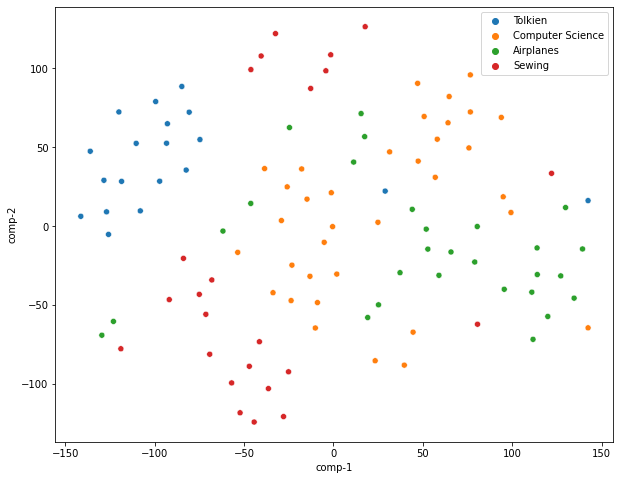

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# get a figure handle
fig,ax = plt.subplots(figsize=(10,8))

df = pd.DataFrame()
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

print(len(target_topics))
sns.scatterplot(x="comp-1", y="comp-2", hue=target_topics, markers=target_topics,
                data=df)



**Question:** Comment about the categorizion done by T-SNE. Do the articles of related topics cluster together? (5 points)

**Answer(1-3 sentences):**  
  


The data does generally appear to be well-clustered.  Even where it appears to not be so well-clustered, it sort of makes sense.  For instance, we see the sewing group invading the Tolkien group in its upper-right extremity.  Tolkien's works contain a lot of references to sewing and embroidering of sigils on flags, so intuitively that does not seem out of place.  I tried to choose topics and subtopics that would be rather different, and I think that's reflected here.  Other than the Tolkien/sewing  intermixing, everything is rather contained in its own group.

# Question 3. Building Multinomial Naive Bayes and Neural Networks on Countvectors

### We are gonna use Disaster Tweets Datasset for this task. We need to Predict which Tweets are about real disasters and which ones are not.

### We are providing data.csv file along with this notebook. 

### Library Imports and Utility functions

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import string
import pandas as pd
import re
#string.punctuation
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('words')

stopword = nltk.corpus.stopwords.words('english')
wn = nltk.WordNetLemmatizer()
ps = nltk.PorterStemmer()
words = set(nltk.corpus.words.words())


def clean_text(text):
  # From the last assignment
  text = text.lower()
  text = re.sub(r"http\S+", "", text)
  text = re.sub(r"www.\S+", "", text)
  text_links_removed = "".join([char for char in text if char not in string.punctuation])
  text_cleaned = " ".join([word for word in re.split('\W+', text_links_removed)
      if word not in stopword])
  text = " ".join([wn.lemmatize(word) for word in re.split('\W+', text_cleaned)])
  return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


### Q) Importing the datasets and do the necessary cleaning and convert the text into the vectors which are mentioned in the below code blocks. (10 points)

In [26]:
# Import the data.csv only use 'text' and 'target' columns
data = pd.read_csv('data.csv')[['text', 'target']]

# data
X = data['text']

# and printout the train.shape and validation.shape - DON'T KNOW WHY THIS IS HERE - WE ARE USING KFOLD VALIDATION 

# expected shape of dataset is (7613, 2)
print(data.shape)

(7613, 2)


In [27]:
# clean the text in the dataframe using the clean_text function provided above
X_cleaned = []

for line in X:
    X_cleaned.append(clean_text(line))

In [28]:
# initialise count vectorizer from sklearn module with default parameter
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

# fit and transform on dataset
X_cleaned_transformed = vectorizer.fit_transform(np.array(X_cleaned))

In [29]:
# get the values of target column

y = data['target']

### Q) Build the neural networks using tensorflow keras by following the below instructions. Evaluate the model on different metrics and comment your observations. (15 points)

In [34]:
#%pip install tensorflow
import tensorflow as tf

tf.random.set_seed(42)


# complete this linear model in tensorflow
def build_model(X):

  # layer 1 : input layer
  inp = tf.keras.Input((X.shape[1],))

  # layer 2 : add the dense layer with 64 units and relu activation
  x = tf.keras.layers.Dense(64, activation='relu')(inp)

  # layer 3 : add the dropout layer with dropout rate of 0.5
  x = tf.keras.layers.Dropout(0.5)(x)
  
  # layer 4 : add the dense layer with 32 units with tanh activation and with l2 regularization
  x = tf.keras.layers.Dense(32, activation='tanh', activity_regularizer=tf.keras.regularizers.l2(0.01))(x)
  
  # layer 5 : add the dropout layer with dropout rate of 0.5
  x = tf.keras.layers.Dropout(0.5)(x)

  # layer 6 : add the dense layer with 16 units with tanh activation and with l2 regularization
  x = tf.keras.layers.Dense(16, activation='tanh', activity_regularizer=tf.keras.regularizers.l2(0.01))(x)

  # layer 7 : add the dropout layer with dropout rate of 0.5
  x = tf.keras.layers.Dropout(0.5)(x)

  # layer 8 : output layer with units equal to 1 and activation as sigmoid
  x = tf.keras.layers.Dense(1, activation='sigmoid')(x)

  # use loss as binary crossentropy, optimizer as rmsprop and evaluate model on auc 
  model = tf.keras.models.Model(inputs=inp, outputs=x)
  model.compile(optimizer='rmsprop', loss=tf.keras.losses.BinaryCrossentropy(), metrics=[tf.keras.metrics.AUC()])
  return model


Epoch 1/5
191/191 [==============================] - 5s 20ms/step - loss: 0.6070 - auc_1: 0.7474
Epoch 2/5
191/191 [==============================] - 4s 21ms/step - loss: 0.4499 - auc_1: 0.8831
Epoch 3/5
191/191 [==============================] - 4s 21ms/step - loss: 0.3797 - auc_1: 0.9210
Epoch 4/5
191/191 [==============================] - 4s 20ms/step - loss: 0.3287 - auc_1: 0.9423
Epoch 5/5
48/48 [==============================] - 0s 7ms/step
[[731 137]
 [308 347]]
              precision    recall  f1-score   support

           0       0.70      0.84      0.77       868
           1       0.72      0.53      0.61       655

    accuracy                           0.71      1523
   macro avg       0.71      0.69      0.69      1523
weighted avg       0.71      0.71      0.70      1523

48/48 [==============================] - 1s 8ms/step - loss: 0.6899 - auc_1: 0.7056
[0.6898760199546814, 0.705566942691803]
Epoch 1/5
191/191 [==============================] - 5s 21ms/step - loss: 0

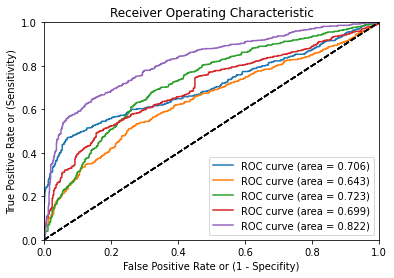

In [36]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
# Now we will initialise the stratified K-Fold from sklearn with nsplits as 5

skf = StratifiedKFold(n_splits=5)

# iterate through the train and valid index in splits for 5 folds
for train_index, test_index in skf.split(X_cleaned_transformed, y):
  # Get X_train, X_valid, y_train, y_valid using indexes
  X_train, X_test = X_cleaned_transformed[train_index], X_cleaned_transformed[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  #call the build_model function and initialize the model
  model = build_model(X_train)

  # train and validate the model on the count vectors of text which we have created initially for 5 epochs, 
  # adjust batch size according to your computation power (suggestion use : 16)
  model.fit(X_train.toarray(), y_train, batch_size=32, epochs=5)
  

  # plot the graph between training auc and validation auc
  y_pred = model.predict(X_test.toarray())
  y_pred_transformed = np.zeros(y_pred.shape)
  y_pred_transformed[y_pred >= 0.5] = 1
  print(confusion_matrix(y_test, y_pred_transformed))
  print(classification_report(y_test, y_pred_transformed))
  print(model.evaluate(X_test.toarray(), y_test, verbose=1))

  # Compute fpr, tpr, thresholds and roc auc
  fpr, tpr, thresholds = roc_curve(y_test, y_pred)
  roc_auc = auc(fpr, tpr)
  
  # Plot ROC curve
  plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
  plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])
  plt.xlabel('False Positive Rate or (1 - Specifity)')
  plt.ylabel('True Positive Rate or (Sensitivity)')
  plt.title('Receiver Operating Characteristic')
  plt.legend(loc="lower right")
 

### Q) Comment on the plots. How did it varied across different folds for neural networks?

Little surprised at the variation, from a low of 64 to a high of 82. Selection of train/test sets definitely makes a huge difference here.

# Building Multinomial Navie Bayes on Countvectors

[[3323  151]
 [ 366 2250]]
F1 Score:  0.914561762618334
Accuracy:  0.9151067323481117
[[706 162]
 [270 385]]
F1 Score:  0.7119127415029146
Accuracy:  0.716349310571241
[[3315  158]
 [ 329 2288]]
F1 Score:  0.9196431022045304
Accuracy:  0.9200328407224959
[[559 310]
 [229 425]]
F1 Score:  0.6477622277638394
Accuracy:  0.6460932370321734
[[3339  134]
 [ 360 2257]]
F1 Score:  0.9183311590382132
Accuracy:  0.9188834154351396
[[590 279]
 [172 482]]
F1 Score:  0.7053567029592783
Accuracy:  0.7038739330269206
[[3314  160]
 [ 328 2289]]
F1 Score:  0.9194990885946789
Accuracy:  0.9198817928090626
[[667 201]
 [241 413]]
F1 Score:  0.7082824366916359
Accuracy:  0.709592641261498
[[3299  175]
 [ 342 2275]]
F1 Score:  0.9147180524196898
Accuracy:  0.9151206698407487
[[588 280]
 [112 542]]
F1 Score:  0.7433041676014658
Accuracy:  0.7424441524310118


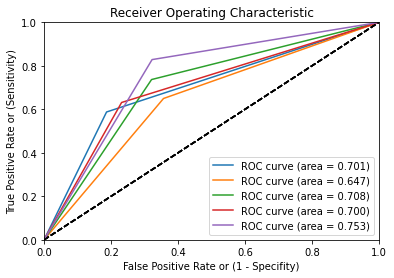

In [37]:
 # fit the data
  
  # plot AUC-ROC curve for validation data

# iterate through the train and valid index in splits for 5 folds. Use the splits created above.
for train_index, test_index in skf.split(X_cleaned_transformed,y):
  # Get X_train, X_valid, y_train, y_valid using indexes
  X_train, X_test = X_cleaned_transformed[train_index], X_cleaned_transformed[test_index] 
  y_train, y_test = y[train_index], y[test_index]

  # intialise multinomial navie bayes with default parameters
  model = MultinomialNB()
  # fit the data
  model.fit(X_train, y_train)
  # plot AUC-ROC curve for validation data
  y_pred = model.predict(X_train)
  F1_score = f1_score(y_train, y_pred, average='weighted') 
  Accuracy = accuracy_score(y_train, y_pred)
  print(confusion_matrix(y_train, y_pred))
  print("F1 Score: ", F1_score)
  print("Accuracy: ", Accuracy)

  y_pred = model.predict(X_test)
  F1_score = f1_score(y_test, y_pred, average='weighted') 
  Accuracy = accuracy_score(y_test, y_pred)
  print(confusion_matrix(y_test, y_pred))
  print("F1 Score: ", F1_score)
  print("Accuracy: ", Accuracy)

  # Compute fpr, tpr, thresholds and roc auc
  fpr, tpr, thresholds = roc_curve(y_test, y_pred)
  roc_auc = auc(fpr, tpr)
  
  # Plot ROC curve
  plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
  plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])
  plt.xlabel('False Positive Rate or (1 - Specifity)')
  plt.ylabel('True Positive Rate or (Sensitivity)')
  plt.title('Receiver Operating Characteristic')
  plt.legend(loc="lower right")  

### Q) Comment on the plots. How did it varied across different folds for Multinomial Naive Bayes?

These results were much more consistent across folds than the neural net results.

## Question 4 Theory Question  

What is the difference between Count Vectorizer, TFIDF, Word2Vec and Glove? (5 points)

**Answer:**

Count vectorizer literally stores just a frequency count of words in documents.

TFIDF uses term frequency and inverse term frequency to moderate the importance of a word based on its frequency, but also multiply it by the inverse document frequency (log of the proportion of the total documents over the documents containing that word). This will tend to discount words that appear everywhere and aren't very discriminative.  Words that appear rarely tend to have a high IDF score.

Word2Vec and Glove are both neural embeddings.  Word2vec measures the likelihood of two words appearing in a given context, wheras glove measures the probability that two words are likely to appear together.

What is the significant difference between the Niave Bayes Implementation using Bag of Words and TF-IDF? (5 points)

**Answer:**

The most significant difference is that bag of words doesn't care anything about the structure of the document, or even frequencies of words.  It just marks which words occur.

TF-IDF is definitely sensitive to how many times a word is used, as well as how many of the documents it appears in.